<a href="https://colab.research.google.com/github/giftajayi/Machine-Learning-Projects/blob/main/Mall_Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyCaret Intro**

In [1]:
!pip install pycaret

In [2]:
from pycaret.clustering import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Dataset**

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## **EDA**

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

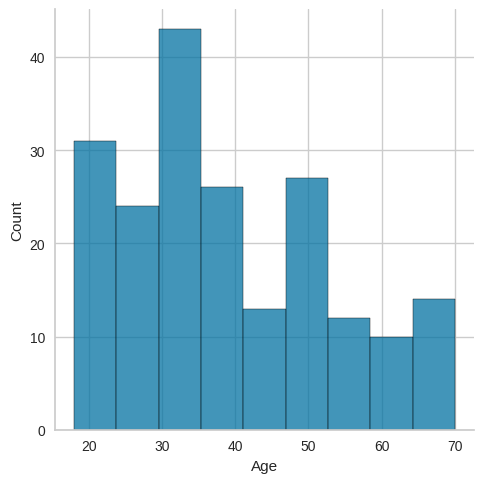

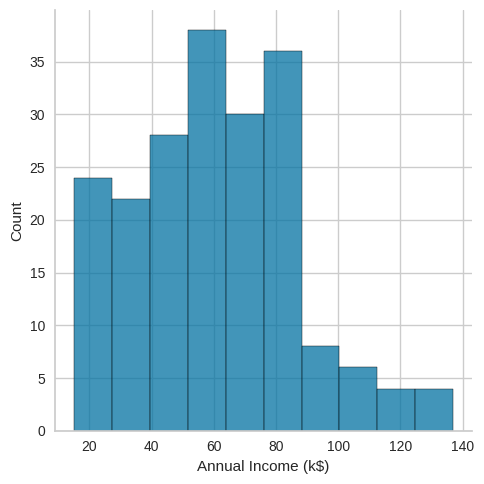

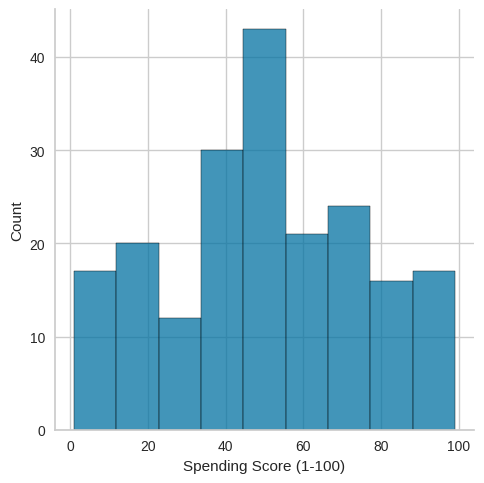

In [6]:
for i in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  sns.displot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

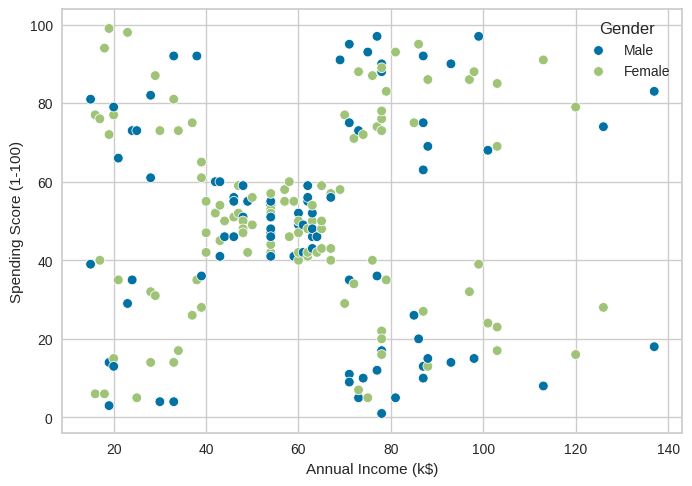

In [7]:
# scatter plot
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue=df['Gender'])

<Axes: ylabel='Age'>

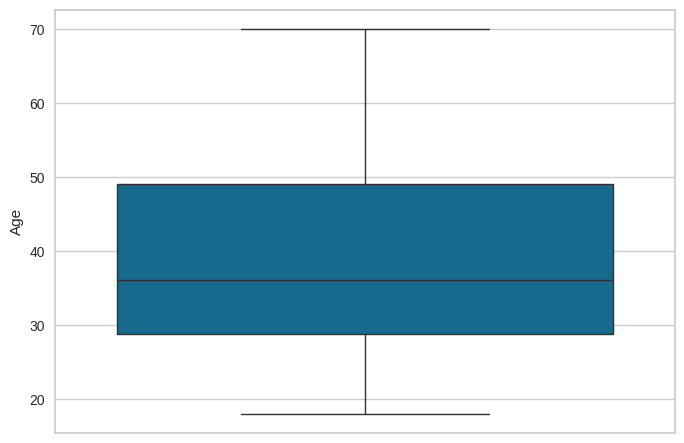

In [8]:
sns.boxplot(df['Age'])

<Axes: ylabel='Annual Income (k$)'>

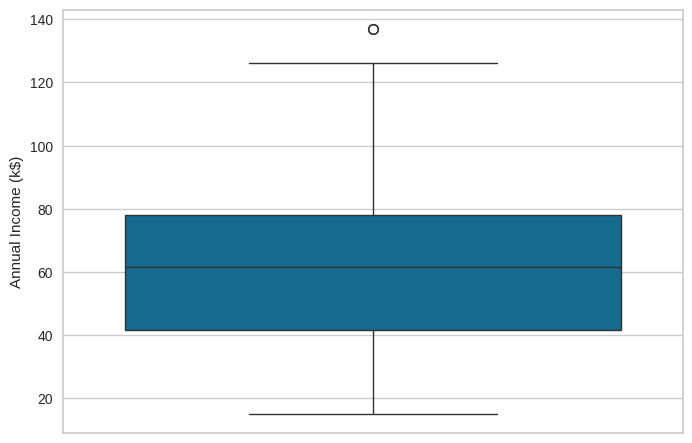

In [9]:
sns.boxplot(df['Annual Income (k$)'])

<Axes: ylabel='Spending Score (1-100)'>

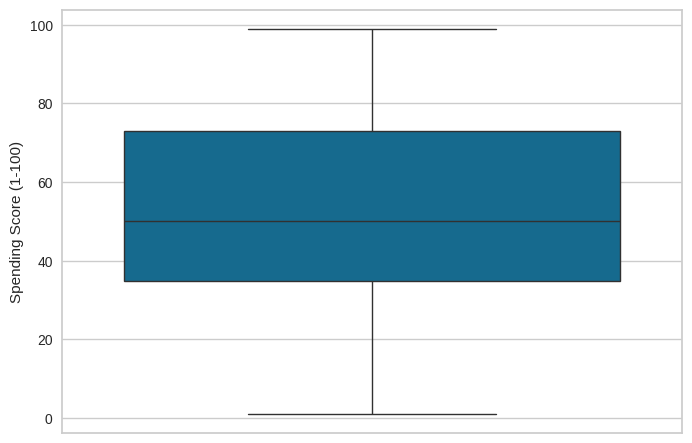

In [10]:
sns.boxplot(df['Spending Score (1-100)'])

<Axes: xlabel='Age', ylabel='Density'>

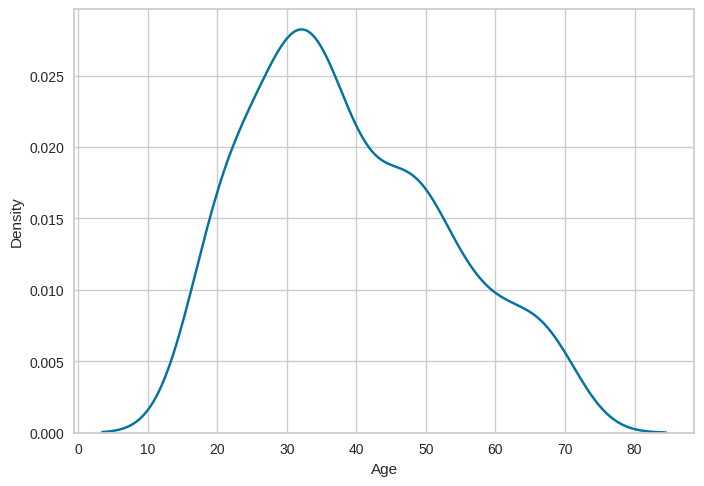

In [11]:
sns.kdeplot(df['Age'])

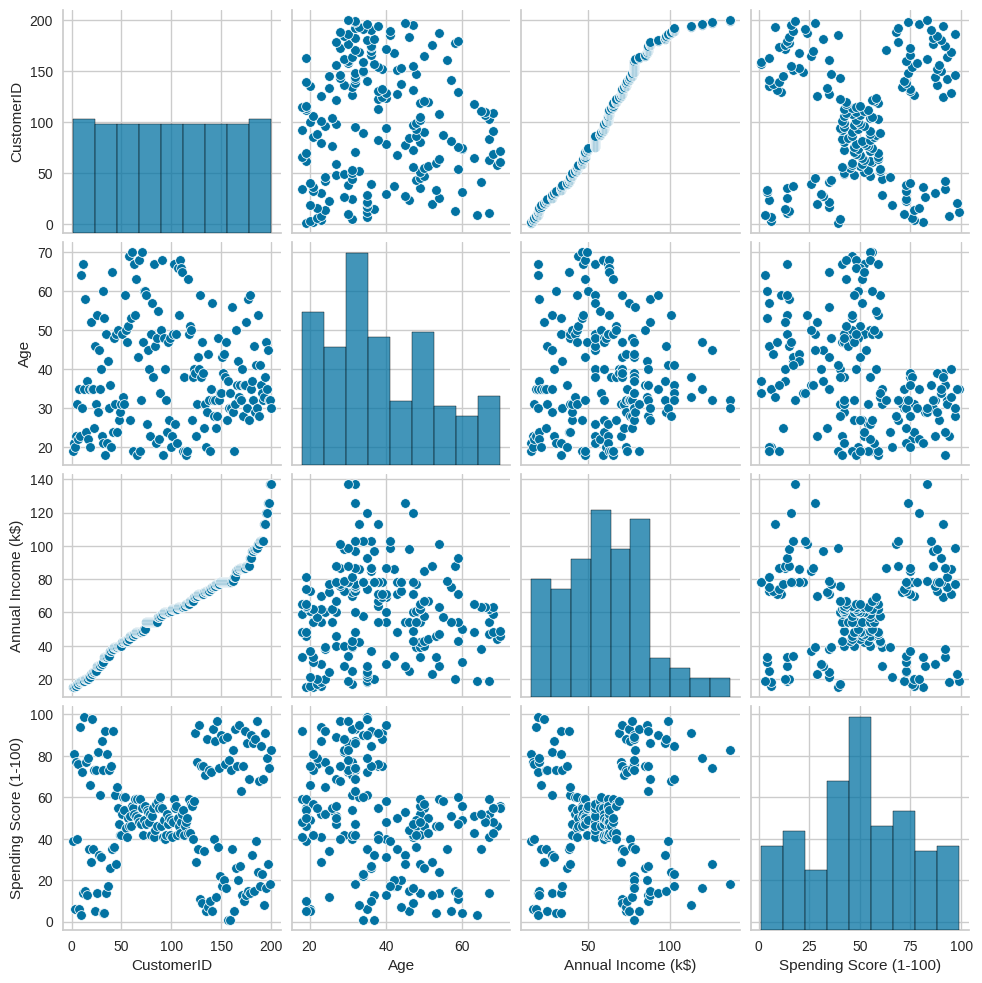

In [12]:
sns.pairplot(df)

# **PyCaret Environment**

In [13]:
setup(df, normalize=True, ignore_features=['CustomerID'], session_id=123)

,Description,Value
0,Session id,123
1,Original data shape,"(200, 5)"
2,Transformed data shape,"(200, 4)"
3,Ignore features,1
4,Numeric features,3
5,Categorical features,1
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


# **Compare, Evaluate and Create Model**

In [14]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [15]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2990,69.1093,1.2821,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [16]:
print(kmeans)

KMeans(n_clusters=4, random_state=123)


In [17]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [18]:
kmeans_df = assign_model(kmeans)
kmeans_df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,Cluster 1
1,Male,21,15,81,Cluster 1
2,Female,20,16,6,Cluster 3
3,Female,23,16,77,Cluster 0
4,Female,31,17,40,Cluster 3


# **Plot the Model**

In [19]:
plot_model(kmeans)

# **Saving Model**

In [20]:
save_model(kmeans, 'kmeans_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Age', 'Annual Income (k$)',
                                              'Spending Score (1-100)'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Gender'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Gender'],
                                     transformer=OrdinalEncoder(cols=['Gender'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Gender',
                                                                          'data_type': dtype('O'),
                                                        